<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(45)
np.random.seed(45)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Для того, чтобы проверяющий мог получить те же результаты, что и студент. Так он сможет убедиться в правильности/неправильности выполненного задания.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [49]:
import pandas as pd

In [50]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')
#df_train = pd.read_csv('/Users/ma.dorokhov/Downloads/cars_train.csv')
#df_test = pd.read_csv('/Users/ma.dorokhov/Downloads/cars_test.csv')
print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [94]:
df_train.sample(30)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
2960,Mahindra Scorpio 2009-2014 EX 9S BSIII,2013,509999,165500,Diesel,Individual,Manual,Second Owner,14.00,2523.0,75.00,9
5576,Maruti Alto LX,2003,100000,164000,Petrol,Individual,Manual,Third Owner,19.70,796.0,46.30,5
5483,Hyundai Verna 1.6 SX CRDi (O),2012,590000,110000,Diesel,Individual,Manual,Second Owner,22.32,1582.0,126.32,5
2837,Hyundai Grand i10 1.2 Kappa Magna AT,2019,550000,15000,Petrol,Individual,Automatic,First Owner,18.90,1197.0,81.86,5
5570,Maruti Swift VDI Optional,2015,475000,60000,Diesel,Individual,Manual,First Owner,25.20,1248.0,74.00,5
415,Maruti Swift Dzire VDI,2019,700000,30000,Diesel,Individual,Manual,First Owner,28.40,1248.0,74.02,5
4339,Ford Fiesta 1.5 TDCi Titanium,2014,500000,80000,Diesel,Individual,Manual,First Owner,25.01,1498.0,89.75,5
1552,Mahindra TUV 300 T8,2015,700000,58945,Diesel,Individual,Manual,First Owner,18.49,1493.0,100.00,7
2031,Hyundai Elantra CRDi SX,2015,869999,120000,Diesel,Individual,Manual,First Owner,22.70,1582.0,126.20,5
4652,Hyundai Elite i20 Petrol Asta,2019,700000,17000,Petrol,Individual,Manual,First Owner,18.60,1197.0,81.86,5


In [52]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [53]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [54]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [55]:
df_train.duplicated().sum() # 985 дубликатов

985

In [98]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_train, title="Profiling Report")
profile.to_file("data_profile.html")

Summarize dataset:  74%|███████▎  | 14/19 [00:00<00:00, 32.39it/s, Calculate auto correlation]c:\Users\maksd\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2 2 2 ... 2 2 2]' has dtype incompatible with int8, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 57.60it/s]


*Что мы можем узнать?*

Из первых 5 строк: названия колонок, типы данных, примеры значений

Из последних 5 строк: аналогично первому + проверить консистентность конца началу датасета

Из случайных строк: примерное распределение признаков, посмотреть уникальные значения категориальных признаков

*Нельзя оценить*
полное распределение данных, взаимосвязь (корреляции) между признаками, выбросы, качество данных

duplicated может не обнаружить частичные дубликаты: например, отличается один признак, но в остальном совпадение.
Еще могут быть тонкости текстовых данных, где может отличаться формат записи чисел (1.00 или 1,00), единиц измерения (1000 км. или 1 тыс. км. или 1к км.)

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [56]:
df_train.fillna(df_train.median(numeric_only=True), inplace = True)
df_test.fillna(df_test.median(numeric_only=True), inplace = True)
#df_train.isna().sum()
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats             0
dtype: int64

### **Задание 2 (0.5 балла)**

На прошлом шаге вы убедились, что явных дубликатов в таблице нет. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [57]:
target_var = 'selling_price'
df_train_without_target = df_train.drop(columns='selling_price')
dups = df_train_without_target.duplicated(keep=False)
dups.sum() # 1799 дубликатов


1799

In [58]:
df_train_target_dups = df_train[dups].sort_values('name')
df_train_target_dups

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3291,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5753,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
1568,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
361,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


In [59]:
df_train_clean = df_train.drop_duplicates(subset = df_train_without_target, keep = 'first')
df_train = df_train_clean.reset_index(drop=True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [60]:
# your code here
df_train.dtypes



name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [61]:
for col in ['mileage', 'engine', 'max_power', 'torque']:
    df_train[col] = df_train[col].astype(str).str.extract(r'(\d+\.?\d*)')[0]
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce')
    df_test[col] = df_test[col].astype(str).str.extract(r'(\d+\.?\d*)')[0]
    df_test[col] = pd.to_numeric(df_test[col], errors='coerce')
df_train = df_train.drop(columns=['torque'])
df_test = df_test.drop(columns=['torque'])
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [62]:
for col in ['engine', 'seats']:
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce', downcast = 'integer')
    df_test[col] = pd.to_numeric(df_test[col], errors='coerce', downcast = 'integer')

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [63]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,5840,5840.000000,5.840000e+03,5.840000e+03,5840,5840,5840,5840,5654.000000,5654.000000,5656.000000,5840.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
freq,91,NaN,NaN,NaN,3177,5223,5336,3603,NaN,NaN,NaN,NaN
mean,NaN,2013.428425,5.229601e+05,7.395224e+04,NaN,NaN,NaN,NaN,19.432842,1435.418111,88.103070,5.426712
std,NaN,4.095622,5.354320e+05,6.007114e+04,NaN,NaN,NaN,NaN,4.051002,492.453262,32.131943,0.982344
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,0.000000,624.000000,0.000000,2.000000
25%,NaN,2011.000000,2.500000e+05,3.900000e+04,NaN,NaN,NaN,NaN,16.800000,1197.000000,68.000000,5.000000
50%,NaN,2014.000000,4.050000e+05,7.000000e+04,NaN,NaN,NaN,NaN,19.370000,1248.000000,81.860000,5.000000
75%,NaN,2017.000000,6.400000e+05,1.000000e+05,NaN,NaN,NaN,NaN,22.320000,1498.000000,100.000000,5.000000


In [64]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981.000000,981.000000,981.000000,1000.000000
unique,621,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,NaN,NaN,NaN,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,19.338206,1458.882773,91.015627,5.403000
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,3.989872,526.228560,35.207383,0.912921
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,0.000000,624.000000,34.200000,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,16.500000,1197.000000,69.000000,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,19.330000,1248.000000,83.100000,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,22.320000,1582.000000,102.000000,5.000000


In [65]:
#assert df_train.shape == (5840, 13)
#признак предобработали



*   Есть выбросы в цене и в километраже -- 10 млн при медиане в 405 тысяч, 375 тысяч при медиане в 61.5 тысяч.
*   Больше всего автомобилей с ручной коробкой передач.
*   Частная продажа самая популярная.
*   Есть пропущенные значения в mileage, engine, max_power
*   Автомобили одной марки могут встречаться несколько раз, например Maruti Swift Dzire VDI встречается в train датасете 15 раз.



## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

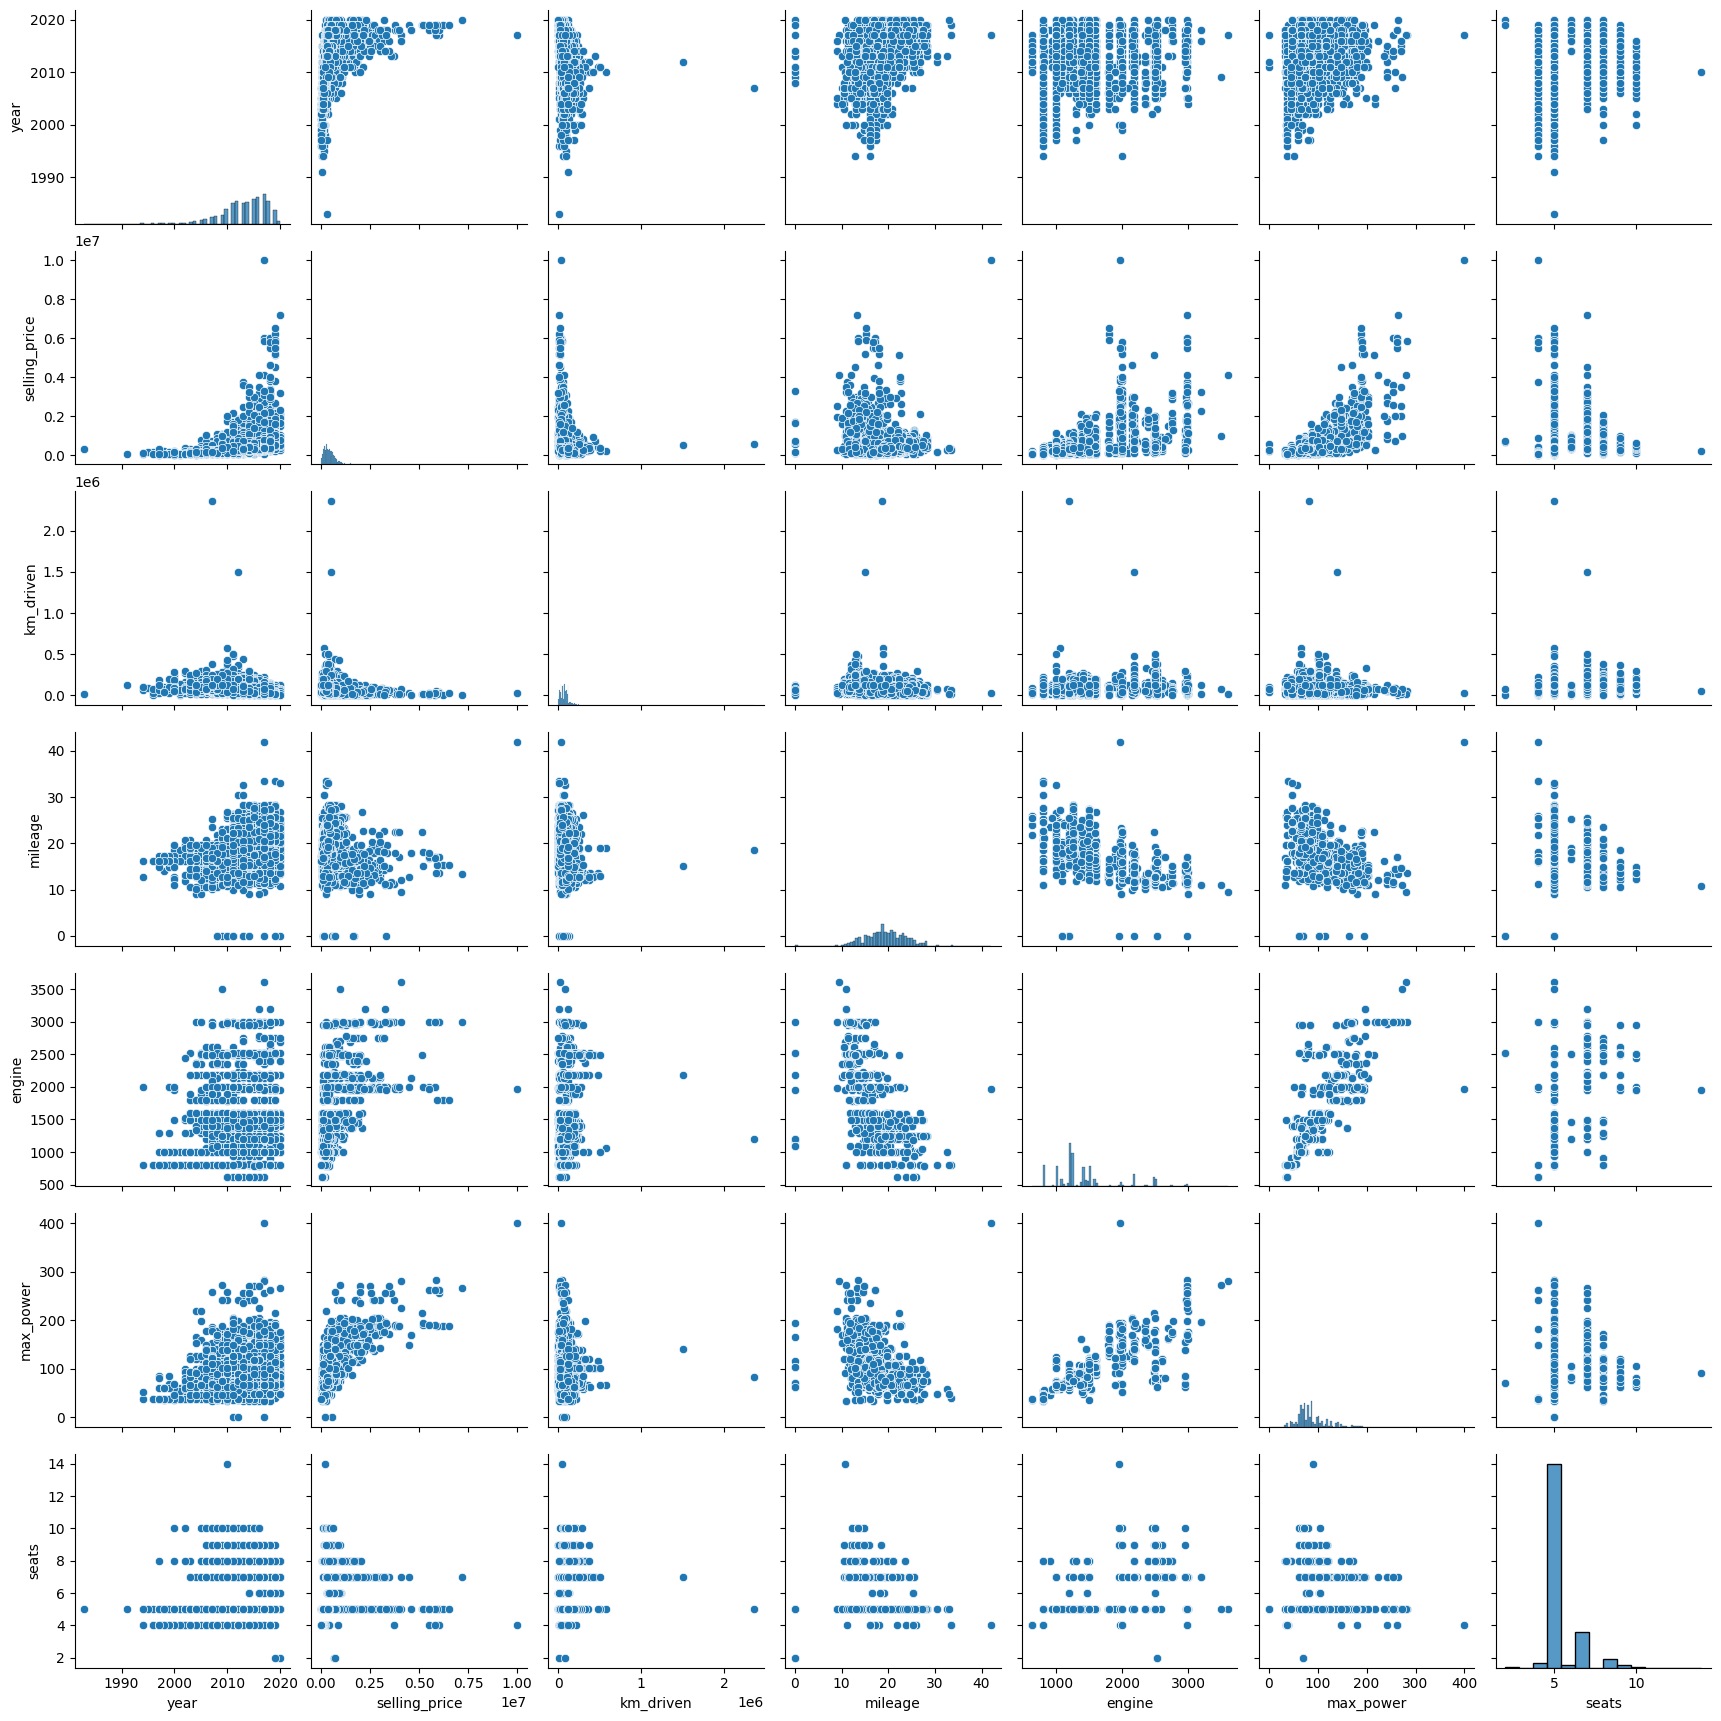

In [66]:
# your code here
sns.pairplot(df_train)

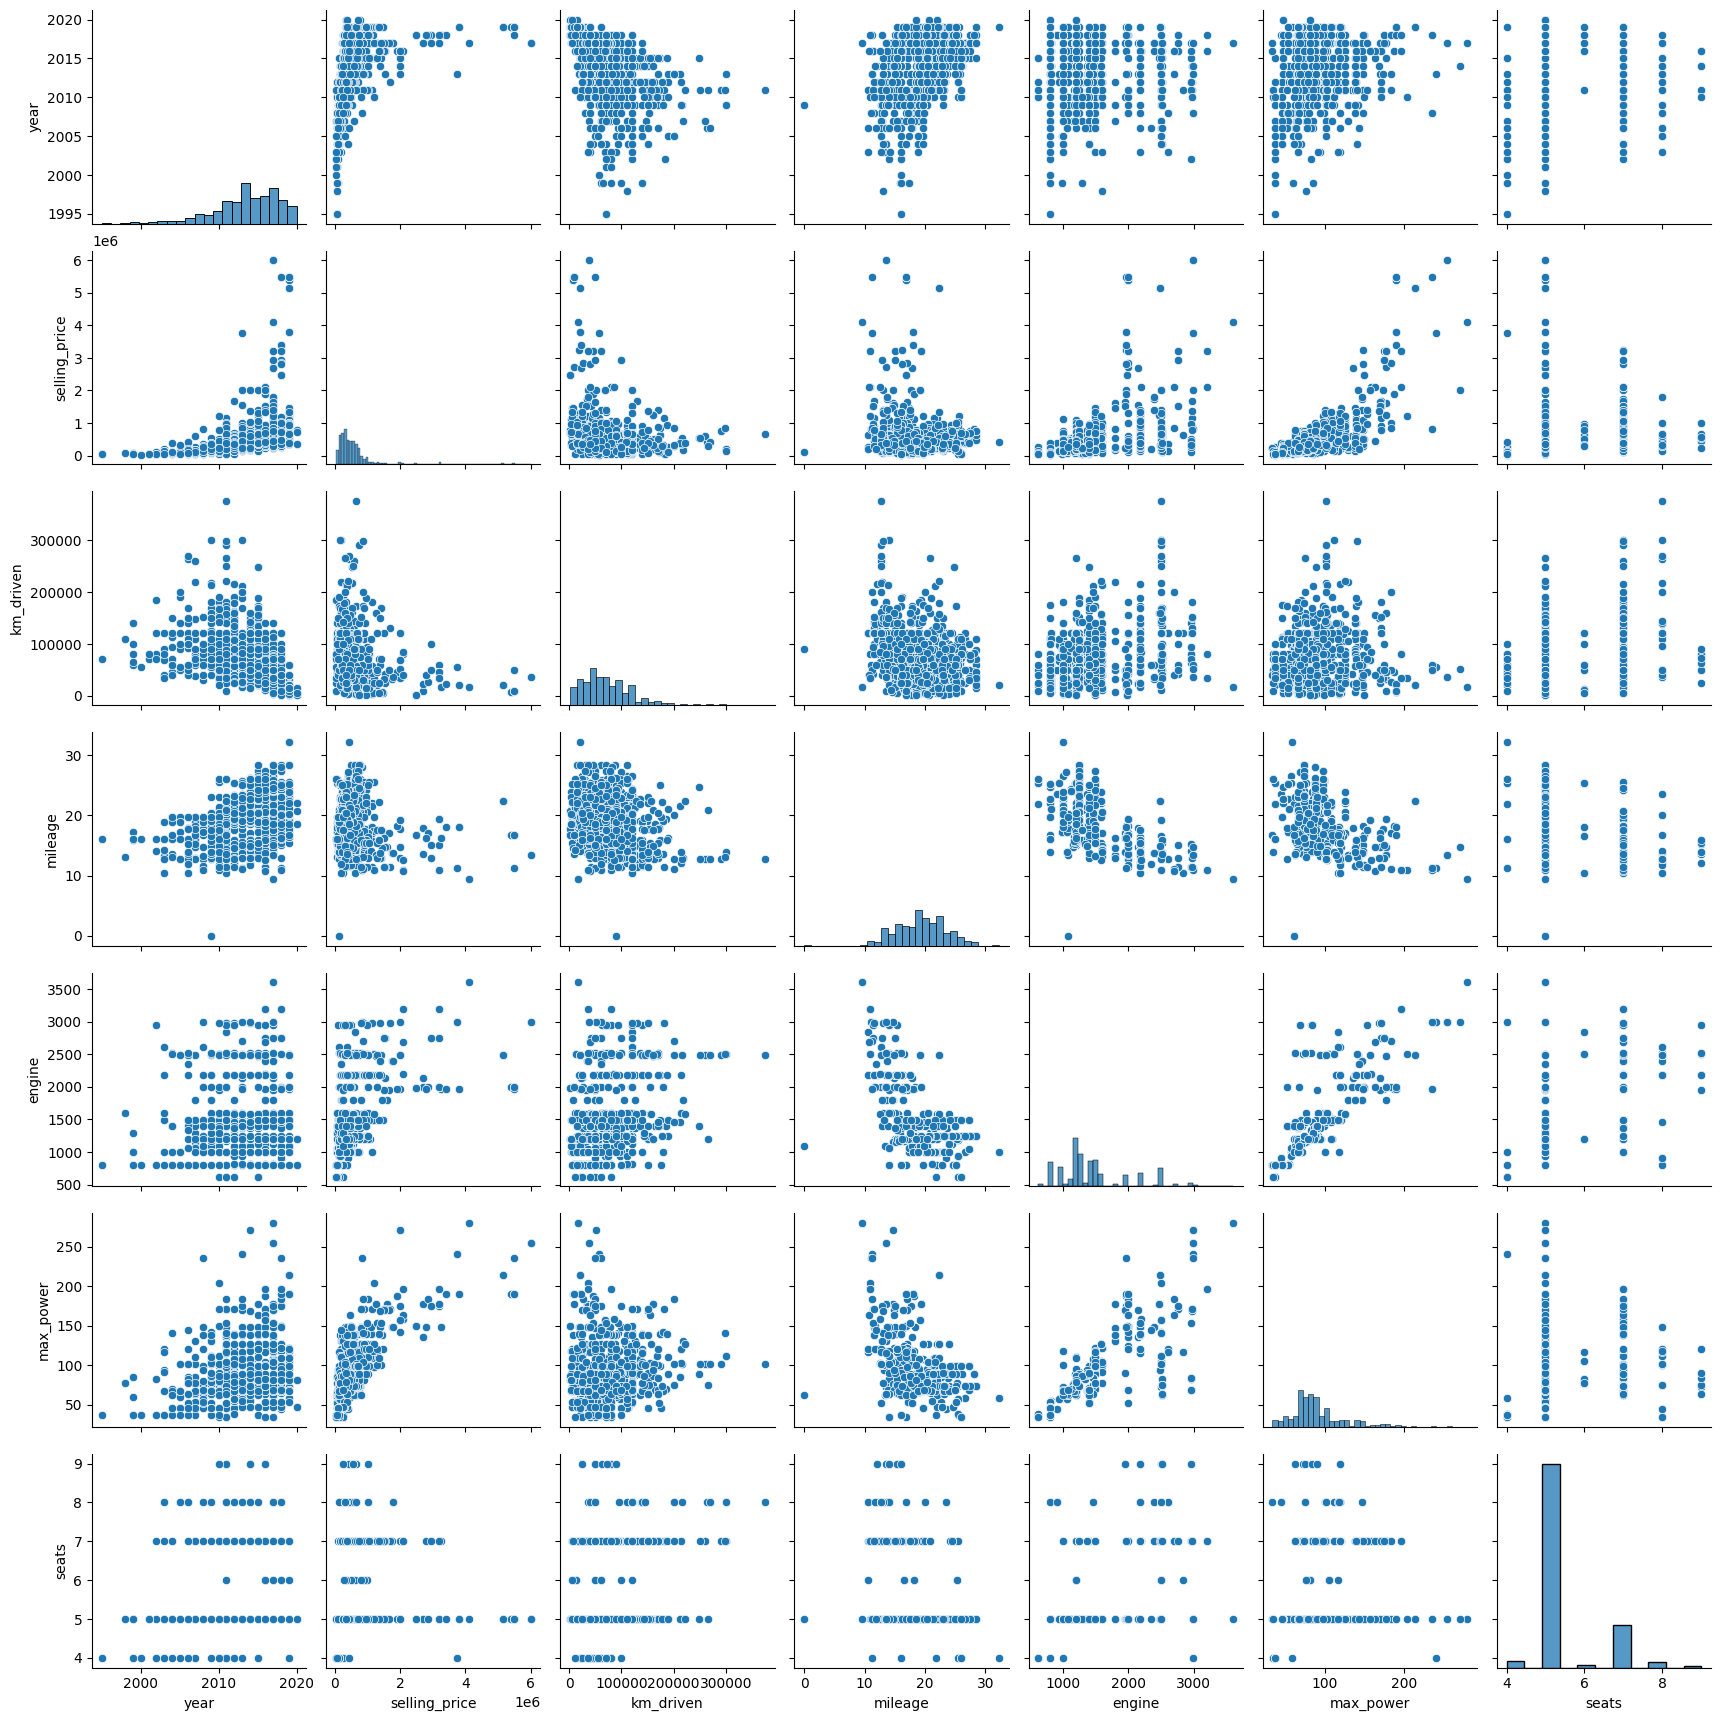

In [67]:
sns.pairplot(df_test)

Можно предположить следующие взаимосвязи с selling_price

*   Отрицательная с km_driven
*   Положительная с year
*   Сильно выраженная положительная линейная взаимосвязь с max_power
*   Положительная с engine

Распределения train и test похожи


### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


Pearson Correlation Matrix:
                 engine  max_power  selling_price      year  km_driven  \
engine         1.000000   0.681640       0.445615 -0.016790   0.235914   
max_power      0.681640   1.000000       0.695593  0.157376   0.026676   
selling_price  0.445615   0.695593       1.000000  0.427279  -0.164828   
year          -0.016790   0.157376       0.427279  1.000000  -0.368966   
km_driven      0.235914   0.026676      -0.164828 -0.368966   1.000000   
mileage       -0.574404  -0.374699      -0.105939  0.363360  -0.183538   

                mileage  
engine        -0.574404  
max_power     -0.374699  
selling_price -0.105939  
year           0.363360  
km_driven     -0.183538  
mileage        1.000000  


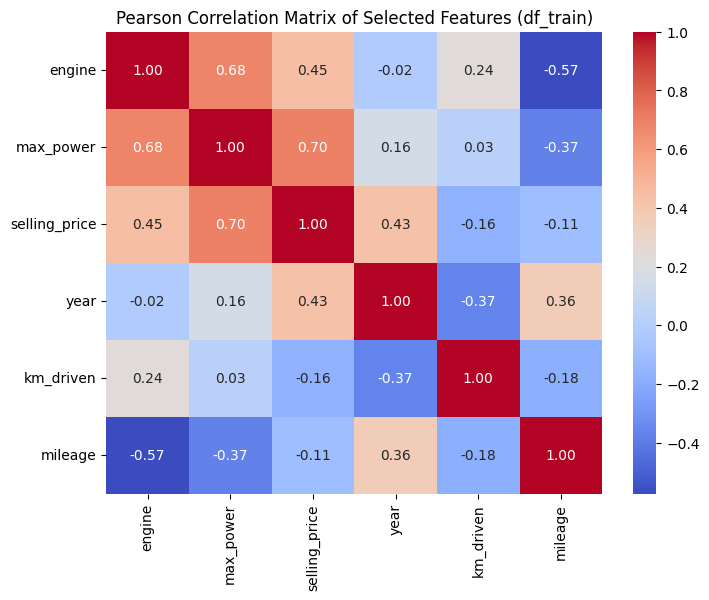

In [68]:
selected_columns = ['engine', 'max_power', 'selling_price', 'year', 'km_driven', 'mileage']
correlation_matrix = df_train[selected_columns].corr(method='pearson')
print("Pearson Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix of Selected Features (df_train)')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Слабее всего скоррелированы год и двигателя. Сильную положительную линейную зависимость можно увидеть у признаков мощность <-> двигатель и цена <-> мощность. Чем меньше год тем, наоборот, больше проехала машина к дате продажи, это объясняется отрицательной корреляцией признаков year и km_driven.`

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

In [69]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [70]:
df_train.fillna(df_train.median(numeric_only=True), inplace = True)
df_test.fillna(df_test.median(numeric_only=True), inplace = True)

In [71]:
y_train = df_train['selling_price']
X_train = df_train[['mileage', 'engine', 'max_power', 'seats', 'km_driven', 'year']]

In [72]:
assert X_train.shape == (5840, 6)

In [73]:
y_test = df_test['selling_price']
X_test = df_test[['mileage', 'engine', 'max_power', 'seats', 'km_driven', 'year']]

In [74]:
assert X_test.shape == (1000, 6)

In [75]:
X_test.isna().sum()

mileage      0
engine       0
max_power    0
seats        0
km_driven    0
year         0
dtype: int64

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R:", r2_score(y_test, y_pred))
print("MSE:", MSE(y_test, y_pred))

R: 0.594141968112603
MSE: 233298786264.09412


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("R2:", r2_score(y_test, y_pred))
print("MSE:", MSE(y_test, y_pred))

R2: 0.5941419681125573
MSE: 233298786264.12036


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [78]:
print(f"Самый большой по модулю коэффициент: {np.argmax(np.abs(model.coef_))}, его значение: {np.max(np.abs(model.coef_)):.4f}")
#максимальная мощность двигателя больше всего влияет на предсказание цены

Самый большой по модулю коэффициент: 2, его значение: 322807.3533


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [79]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1.0, random_state = 42)
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)
print(f"R2: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {MSE(y_test, y_pred):.4f}")
print(lasso.coef_)

R2: 0.5941
MSE: 233299448261.6601
[ 28832.36579574  61173.86464071 322808.25195757 -23206.20391427
 -44157.78528905 152772.2360366 ]


In [80]:
feature_names = X_train.columns
zero_features = [name for name, c in zip(feature_names, lasso.coef_) if c == 0]
print("Занулённые признаки:", zero_features)

Занулённые признаки: []


### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [81]:
from sklearn.model_selection import GridSearchCV

grid = {'alpha': np.logspace(-4, 1, 20)}
lasso = Lasso()
grid_lasso = GridSearchCV(
    estimator=lasso,
    param_grid=grid,
    cv=10,
    scoring='r2',
)
grid_lasso.fit(X_train_scaled, y_train)
best_lasso = grid_lasso.best_estimator_
best_alpha = grid_lasso.best_params_
best_score = grid_lasso.best_score_

print(f"Лучший выбор alpha: {best_alpha['alpha']}")
print(f"R2: {best_score:.4f}")
print(f"Моделей было обучено: {len(grid['alpha'])*10}")

Лучший выбор alpha: 10.0
R2: 0.5682
Моделей было обучено: 200


In [82]:
coef = best_lasso.coef_
coef
#веса не занулились

array([ 28819.91333661,  61135.62858389, 322815.12342779, -23180.90307589,
       -44149.00297268, 152768.7149522 ])

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [83]:
from sklearn.linear_model import ElasticNet

grid = {
    'alpha': np.logspace(-4, 1, 20),
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

elasticnet = ElasticNet(random_state = 42, max_iter = 10000)
grid_elastic = GridSearchCV(
    estimator=elasticnet,
    param_grid=grid,
    cv=10,
    scoring='r2',
)

grid_elastic.fit(X_train_scaled, y_train)
best_params = grid_elastic.best_params_
best_score = grid_elastic.best_score_

print(f"Лучшие гиперпараметры: {best_params}")
print(f"Лучший R2: {best_score:.4f}")
print(f"Обучено моделей: {len(grid['alpha']) * len(grid['l1_ratio']) * 10}")


Лучшие гиперпараметры: {'alpha': 0.4832930238571752, 'l1_ratio': 0.7}
Лучший R2: 0.5768
Обучено моделей: 1000


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [84]:
X_train_cat = df_train.drop(columns = ['name'])
X_test_cat = df_test.drop(columns = ['name'])

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [85]:
#assert X_train_cat.shape == (5840, 10)

In [86]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [87]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

cat_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=int)
ohe_train = ohe.fit_transform(df_train[cat_cols])
ohe_test = ohe.transform(df_test[cat_cols])
feature_names = ohe.get_feature_names_out(cat_cols)

ohe_train_df = pd.DataFrame(ohe_train, columns=feature_names, index=df_train.index)
ohe_test_df = pd.DataFrame(ohe_test, columns=feature_names, index=df_test.index)

X_train_num = df_train.drop(columns=cat_cols + ['name'] )  # оставляем только числовые
X_test_num = df_test.drop(columns=cat_cols + ['name'])  # предположим, 'target' только в трейне


X_train_final = pd.concat([X_train_num, ohe_train_df], axis=1)
X_test_final = pd.concat([X_test_num, ohe_test_df], axis=1)

X_train_final.head(10)

,year,selling_price,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,450000,145500,23.40,1248.0,74.00,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,2014,370000,120000,21.14,1498.0,103.52,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,2010,225000,127000,23.00,1396.0,90.00,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,2007,130000,120000,16.10,1298.0,88.20,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
4,2017,440000,45000,20.14,1197.0,81.86,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
5,2007,96000,175000,17.30,1061.0,57.50,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
6,2001,45000,5000,16.10,796.0,37.00,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
7,2011,350000,90000,23.59,1364.0,67.10,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8,2013,200000,169000,20.00,1399.0,68.10,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9,2014,500000,68000,19.01,1461.0,108.45,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [88]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
X_train = X_train_final.drop(columns = ['selling_price'])
y_train = X_train_final['selling_price']
X_test = X_test_final.drop(columns = ['selling_price'])
y_test = X_test_final['selling_price']
grid = {'alpha': np.logspace(-4, 1, 20)}
ridge = Ridge()

grid_ridge = GridSearchCV(
    estimator = ridge,
    param_grid = grid,
    cv = 10,
    scoring = 'r2'
)

grid_ridge.fit(X_train, y_train)
best_alpha = grid_ridge.best_params_['alpha']
best_r2_cv = grid_ridge.best_score_

print(f"Лучший alpha: {best_alpha}")
print(f"Лучший R² на кросс-валидации: {best_r2_cv:.4f}")

#получали значение r2 = 0.59, здесь получили r2 = 0.6219 => качество увеличилось

c:\Users\maksd\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=5.05758e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
c:\Users\maksd\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=9.27045e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
c:\Users\maksd\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.69926e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
c:\Users\maksd\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.1147e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
c:\Users\maksd\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\_lib\_

Лучший alpha: 5.455594781168514
Лучший R² на кросс-валидации: 0.6219


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [89]:
def business_metric(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    good_predicts = np.abs(y_true - y_pred) < 0.1 * y_true
    return good_predicts.mean()

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lr = linreg.predict(X_test)
grid_elastic.fit(X_train, y_train)
grid_lasso.fit(X_train, y_train)
grid_ridge.fit(X_train, y_train)
y_pred_elastic = grid_elastic.predict(X_test)
y_pred_lasso = grid_lasso.best_estimator_.predict(X_test)
y_pred_ridge = grid_ridge.best_estimator_.predict(X_test)

predictions = {
    'LinearRegression': y_pred_lr,
    'Elastic': y_pred_elastic,
    'Lasso': y_pred_lasso,
    'Ridge': y_pred_ridge
}

c:\Users\maksd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.397e+14, tolerance: 1.550e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\maksd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.427e+14, tolerance: 1.597e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\maksd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

In [90]:
business_scores = {}
for model_name, y_pred in predictions.items():
    score = business_metric(y_test, y_pred)
    business_scores[model_name] = score
    print(f"{model_name}: {score:.4f} ({score * 100:.2f}%)")

# Находим лучшую модель
best_model = max(business_scores, key=business_scores.get)
best_score = business_scores[best_model]

LinearRegression: 0.2500 (25.00%)
Elastic: 0.2470 (24.70%)
Lasso: 0.2500 (25.00%)
Ridge: 0.2450 (24.50%)


Лучшие модели по бизнес-метрике: LinearRegression и Lasso с показателем в 25%

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 18 (1 балл)**


In [91]:
import pickle
inference_artifacts = {

    'best_model': best_model,
    'best_score': best_score,

    'models': {
        'LinearRegression': linreg,
        'Elastic': grid_elastic.best_estimator_,
        'Lasso': grid_lasso.best_estimator_,
        'Ridge': grid_ridge.best_estimator_
    },

    'model_params': {
        'LinearRegression': linreg.get_params(),
        'Elastic': grid_elastic.best_params_,
        'Lasso': grid_lasso.best_params_,
        'Ridge': grid_ridge.best_params_
    },

    'scaler': scaler,
    'business_scores': business_scores
}

with open('hw1_artifacts.pickle', 'wb') as f:
    pickle.dump(inference_artifacts, f)


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Далее в этот же репозиторий вы прикрепите вторую часть. Под результатами первой части понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)
